<a href="https://colab.research.google.com/github/Raph3103/hw4atam/blob/main/Copie_de_HW1_template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#HW1 - Data Exploration and Preparation

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection

## Loading the dataset

In [3]:
!rm *.csv

from google.colab import files
print("Please load the raw csv data")
uploadedData = files.upload()
filename = list(uploadedData)[0]

rm: cannot remove '*.csv': No such file or directory
Please load the raw csv data


Saving virus_data.csv to virus_data.csv


In [4]:
dataset = pd.read_csv(filename)

In [5]:
dataset.shape

(1250, 25)

# How to download from Colab?

In [6]:
from google.colab import files
outputPath = "saved_file.csv"
dataset.to_csv(outputPath)
files.download(outputPath)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [7]:
#Q2
dataset['conversations_per_day'].value_counts()

conversations_per_day
3     218
2     204
5     179
4     168
1     108
6     107
7      94
8      54
9      42
10     29
11     16
13      8
12      7
14      6
16      5
15      3
17      1
29      1
Name: count, dtype: int64

In [8]:
#Q4
sum_tz = 62 + 8
trainingSet,testSet=model_selection.train_test_split(dataset, train_size=0.8, test_size=0.2, random_state=sum_tz)


In [9]:
#Q5
trainingSet.isnull().sum()


patient_id                0
age                       0
sex                       0
weight                    0
blood_type                0
current_location          0
num_of_siblings           0
happiness_score           0
household_income         86
conversations_per_day     0
sugar_levels              0
sport_activity            0
pcr_date                  0
PCR_01                    0
PCR_02                    0
PCR_03                    0
PCR_04                    0
PCR_05                    0
PCR_06                    0
PCR_07                    0
PCR_08                    0
PCR_09                    0
PCR_10                    0
spread                    0
risk                      0
dtype: int64

In [10]:
testSet.isnull().sum()

patient_id                0
age                       0
sex                       0
weight                    0
blood_type                0
current_location          0
num_of_siblings           0
happiness_score           0
household_income         23
conversations_per_day     0
sugar_levels              0
sport_activity            0
pcr_date                  0
PCR_01                    0
PCR_02                    0
PCR_03                    0
PCR_04                    0
PCR_05                    0
PCR_06                    0
PCR_07                    0
PCR_08                    0
PCR_09                    0
PCR_10                    0
spread                    0
risk                      0
dtype: int64

<Axes: >

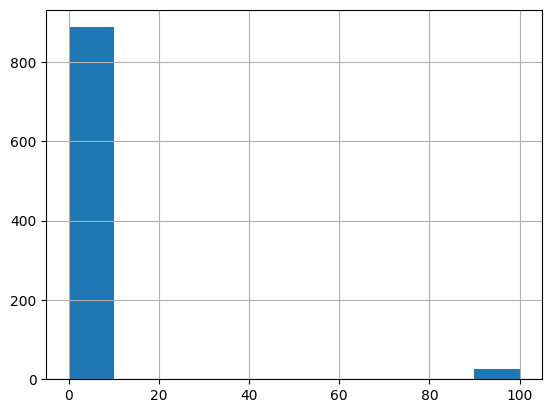

In [11]:
trainingSet['household_income'].hist()

In [12]:
trainingSet['household_income'].mean()

3.6426695842450774

In [13]:
trainingSet['household_income'].median()

0.7

In [14]:
trainingSet['household_income'].fillna(trainingSet['household_income'].median(), inplace=True)
testSet['household_income'].fillna(testSet['household_income'].median(), inplace=True)


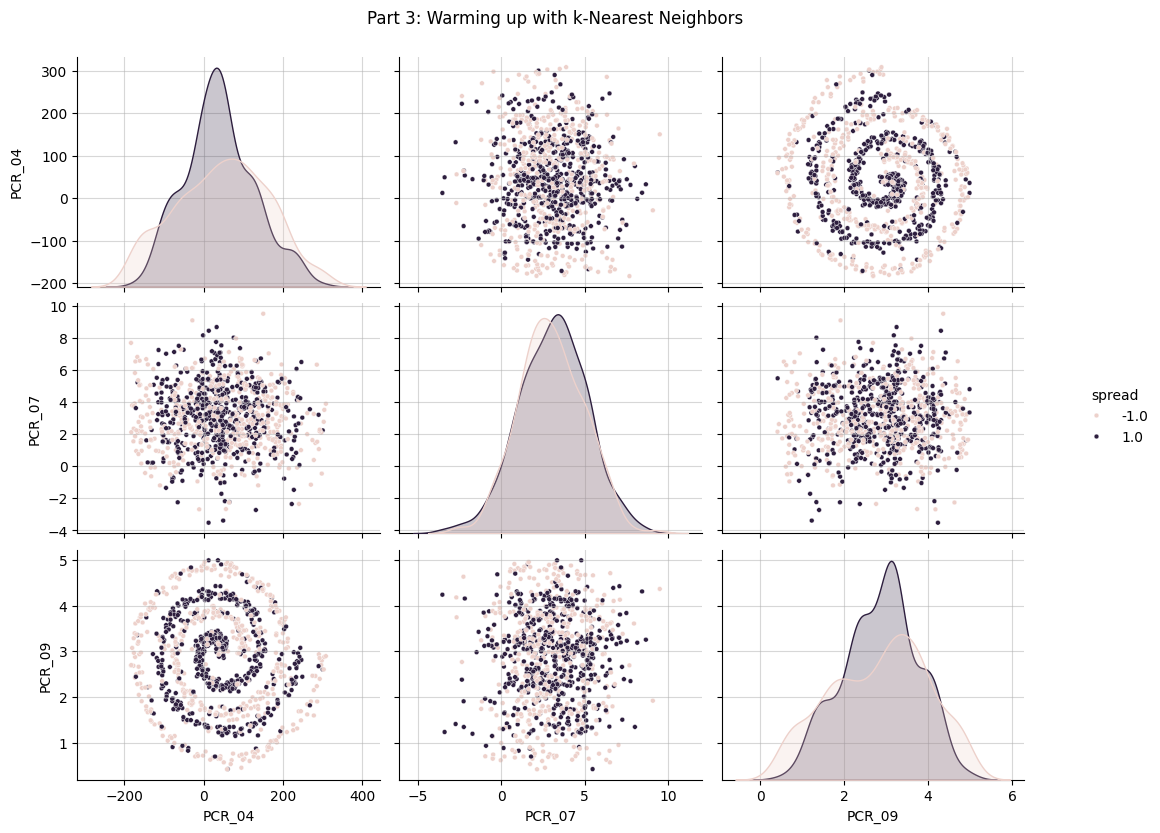

In [15]:
#Task B
g=sns.pairplot(trainingSet[["spread","PCR_04","PCR_07","PCR_09"]], plot_kws={"s": 12},hue="spread")
g.fig.suptitle("Part 3: Warming up with k-Nearest Neighbors ", y=1.04)

for ax in np.ravel(g.axes):
  ax.grid(alpha=0.5)

g.fig.set_size_inches(12,8)


In [16]:
#Task C
from sklearn.base import BaseEstimator,ClassifierMixin
from scipy.spatial.distance import cdist
class kNN(BaseEstimator, ClassifierMixin):
  def __init__(self, n_neighbors:int = 3):
    self.n_neighbors = n_neighbors
    self.train_x = None
    self.train_y = None

  def fit(self, X, y):
    self.train_x = X.copy()
    self.train_y = y.copy()
    return self

  def predict(self, X):
      distances = cdist(X, self.train_x)
      minDictances = self.train_y.to_numpy()[distances.argpartition(self.n_neighbors)]
      predictions = [np.sign(sum(row[:self.n_neighbors])) for row in minDictances]
      return np.asarray(predictions)



In [17]:
def visualize_clf(clf, X, Y, title,
                  xlabel, ylabel,
                  marker_size=50,
                  grid_length=300,
                  linewidths=None):
    import matplotlib.pyplot as plt
    import pandas as pd
    from matplotlib.colors import ListedColormap

    if isinstance(X, pd.DataFrame):
        X = X.to_numpy()

    # For internal use here, make sure labels are 0 and 1
    Y = np.ravel(Y).astype(int)
    labels = set(Y)
    assert len(labels) == 2, "Can only visualize two unique labels"

    if labels == set([-1,1]):
      Y = (Y + 1) // 2
      labels = set(Y)

    assert labels == set([0,1]), "Could not handle given labels"

    plt.figure(figsize=(8, 8))

    # Parameters
    n_classes = 2
    markers = ["D", "o"]
    palette = sns.color_palette("hls", 2)
    custom_cmap = ListedColormap(palette.as_hex())

    x_delta = np.abs(X[:, 0].max() - X[:, 0].min()) * 0.1
    y_delta = np.abs(X[:, 1].max() - X[:, 1].min()) * 0.1
    x_min, x_max = X[:, 0].min() - x_delta, X[:, 0].max() + x_delta
    y_min, y_max = X[:, 1].min() - y_delta, X[:, 1].max() + y_delta
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, grid_length),
                         np.linspace(y_min, y_max, grid_length))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    cs = plt.contourf(xx, yy, Z, cmap=custom_cmap, alpha=0.35)

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(alpha=0.75)

    # Plot the training points
    for i, color, marker in zip(labels, palette, markers):
        idx = np.where(Y == i)
        plt.scatter(X[idx, 0], X[idx, 1], color=color,
                    marker=marker,
                    edgecolor='white', s=marker_size,
                    linewidths=linewidths)

    plt.title(title, fontsize=20)
    plt.axis("tight")
    plt.show()


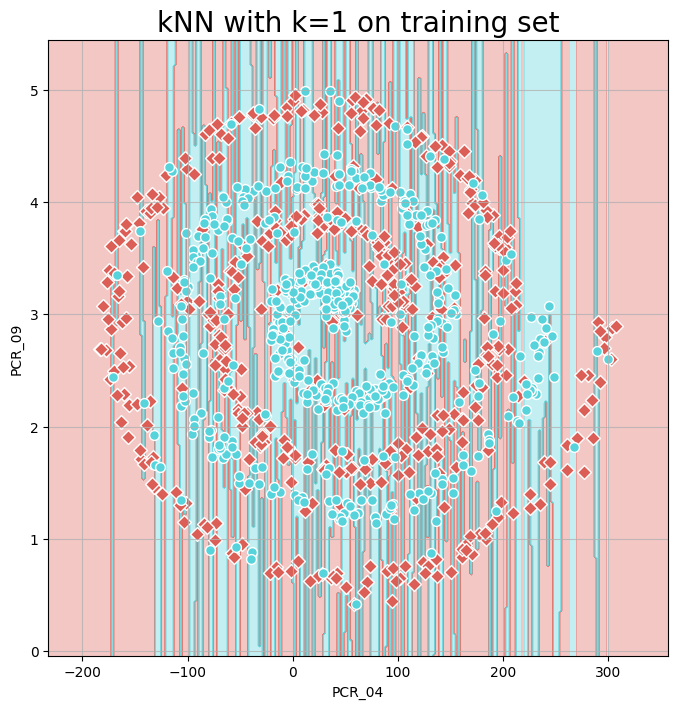

1.0

In [18]:
#Task D
xTraining,yTraining=trainingSet[["PCR_04","PCR_09"]],trainingSet["spread"]
knnTest = kNN(1)
knnTest.fit(xTraining,yTraining)
visualize_clf(knnTest,xTraining,yTraining,"kNN with k=1 on training set","PCR_04","PCR_09")
knnTest.score(xTraining,yTraining)

In [19]:
knnTest.score(testSet[["PCR_04","PCR_09"]],testSet["spread"])

0.584

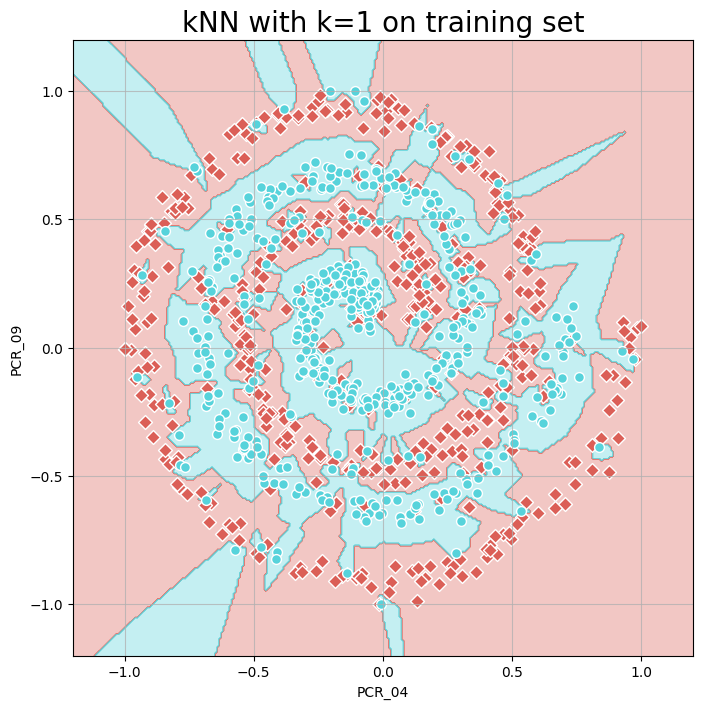

The score of knn with k = 1 after normalization is:  1.0


In [20]:
#Q11
from sklearn.preprocessing import MinMaxScaler
Scaler=MinMaxScaler(feature_range=(-1,1))
fittedXTraining=Scaler.fit_transform(xTraining)

knnTestMinMaxFit = kNN(1)
knnTestMinMaxFit.fit(fittedXTraining,yTraining)
visualize_clf(knnTestMinMaxFit,fittedXTraining,yTraining,"kNN with k=1 on training set","PCR_04","PCR_09")
knnTestMinMaxFit.score(fittedXTraining,yTraining)

knn1_scaled = kNN(1).fit(fittedXTraining, yTraining)
print("The score of knn with k = 1 after normalization is: ", knn1_scaled.score(fittedXTraining, yTraining))

In [21]:
knn1_scaled.score(Scaler.fit_transform(testSet[["PCR_04","PCR_09"]]),testSet["spread"])

0.724

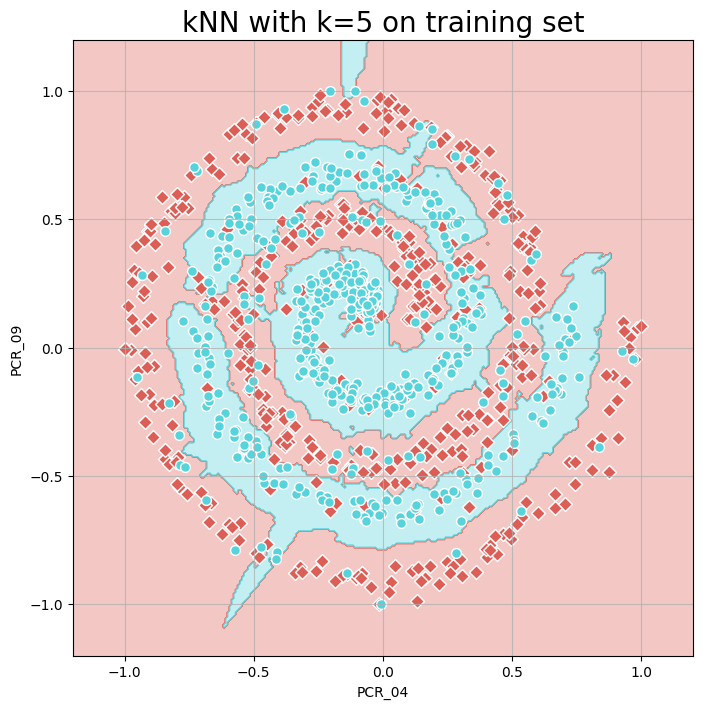

The score of knn with k = 5 after normalization is:  0.85


In [22]:
knn_five_TestMinMaxFit = kNN(5)
knn_five_TestMinMaxFit.fit(fittedXTraining,yTraining)
visualize_clf(knn_five_TestMinMaxFit,fittedXTraining,yTraining,"kNN with k=5 on training set","PCR_04","PCR_09")
knn_five_TestMinMaxFit.score(fittedXTraining,yTraining)

knn5_scaled = kNN(5).fit(fittedXTraining, yTraining)
print("The score of knn with k = 5 after normalization is: ", knn5_scaled.score(fittedXTraining, yTraining))

In [23]:
knn5_scaled.score(Scaler.fit_transform(testSet[["PCR_04","PCR_09"]]),testSet["spread"])

0.792

In [31]:
#Task E

dataset['SpecialProperty'] = dataset["blood_type"].isin(["O+", "B+"])
del dataset['blood_type']


,patient_id,age,sex,weight,current_location,num_of_siblings,happiness_score,household_income,conversations_per_day,sugar_levels,...,PCR_04,PCR_05,PCR_06,PCR_07,PCR_08,PCR_09,PCR_10,spread,risk,SpecialProperty
0,733,31,F,80.8,"('11.93381', '79.82979')",6,6,0.7,5,81,...,176.847024,4.385181,10.213329,0.927466,22.333871,2.392578,-126.780598,1.0,1,False
1,382,29,F,63.0,"('51.67822', '33.9162')",1,9,NaN,11,110,...,-7.135415,7.128887,30.027329,-0.084755,1.700489,2.735347,-175.576828,-1.0,-1,True
2,1164,44,F,74.2,"('60.02427', '30.28491')",2,10,1.5,3,91,...,59.712513,1.227654,16.907687,1.609130,7.258721,4.937827,-233.105192,-1.0,-1,True
3,897,9,M,31.8,"('51.08468', '7.11393')",3,9,0.5,8,45,...,72.100204,6.181840,17.018475,2.313162,1.707770,1.686465,-28.548362,-1.0,-1,False
4,1187,18,F,42.4,"('38.45598', '48.87498')",0,8,0.2,4,57,...,187.436001,4.709932,13.888960,5.401181,4.500906,3.767817,-27.173870,-1.0,-1,False


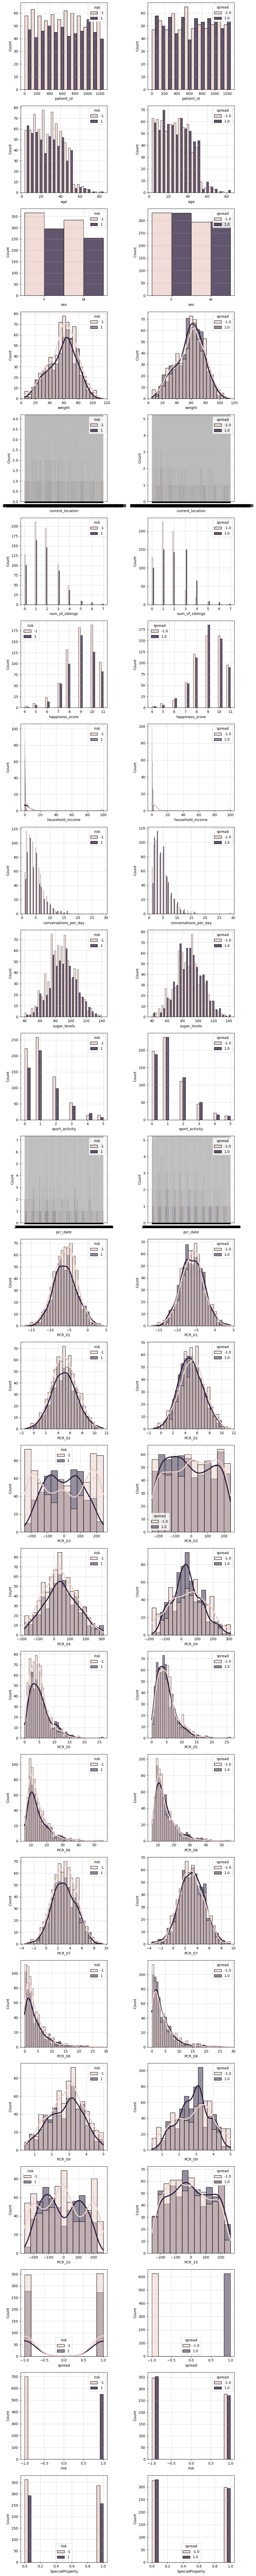

In [32]:

COL_NAME = dataset.columns.values
COLS, ROWS = (2, len(COL_NAME))

plt.figure(figsize=(5 * COLS, 4 * ROWS))
for row in range(ROWS):
  column = COL_NAME[row]

  for j, cls in enumerate(["risk", "spread"]):
    plt.subplot(ROWS,COLS, row * COLS + 1 + j)

    isContinuous = "float" in dataset[column].dtype.name
    sns.histplot(data=dataset, x=column, hue=cls, line_kws={"linewidth": 3},
                 kde=isContinuous, multiple="layer" if isContinuous else "dodge")
    plt.grid(alpha=0.5)

plt.tight_layout()
